# Loading Dataset

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv("Iris.csv")
df


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [2]:
# display first 5 rows
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# checking null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
# no. of rows and columns
df.shape

(150, 6)

In [5]:
# drop the "ID" column
df.drop(columns= ['Id'], inplace= True)

# Visualization

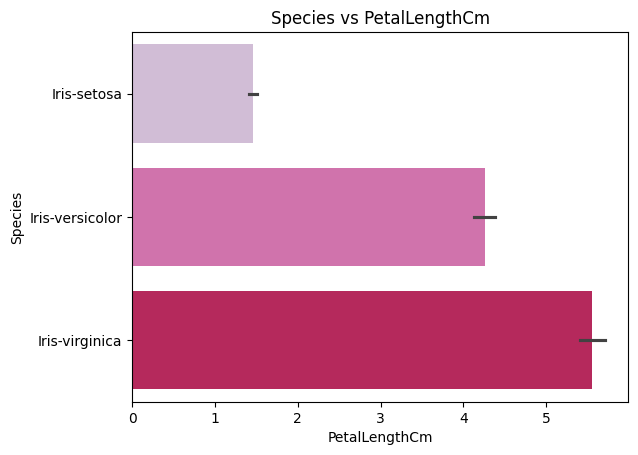

In [6]:
# Species vs PetalLengthCm
sns.barplot(data= df, x= 'PetalLengthCm', y= 'Species', palette= 'PuRd')
plt.xlabel('PetalLengthCm')
plt.ylabel('Species')
plt.title('Species vs PetalLengthCm')
plt.show()


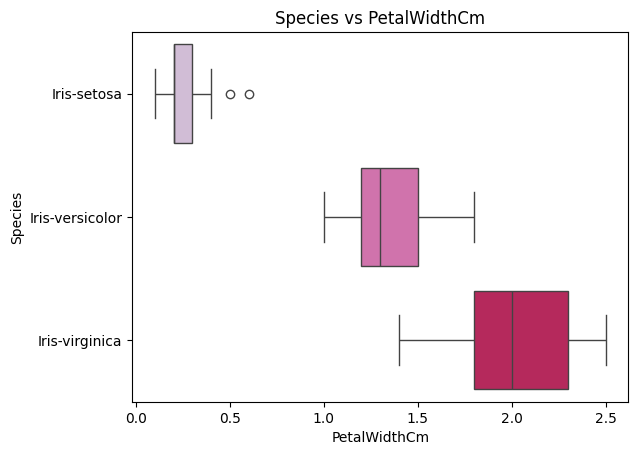

In [7]:
# Species vs PetalWidthCm boxplot

sns.boxplot(data=df, x="PetalWidthCm", y="Species", palette="PuRd")
plt.xlabel('PetalWidthCm')
plt.ylabel('Species')
plt.title('Species vs PetalWidthCm')
plt.show()

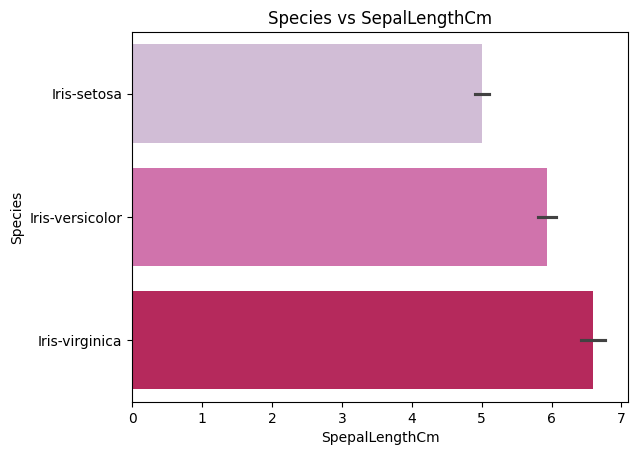

In [8]:
# Species vs SepalLengthCm
sns.barplot(data=df, x="SepalLengthCm", y="Species", palette="PuRd")
plt.xlabel('SpepalLengthCm')
plt.ylabel('Species')
plt.title('Species vs SepalLengthCm')
plt.show()

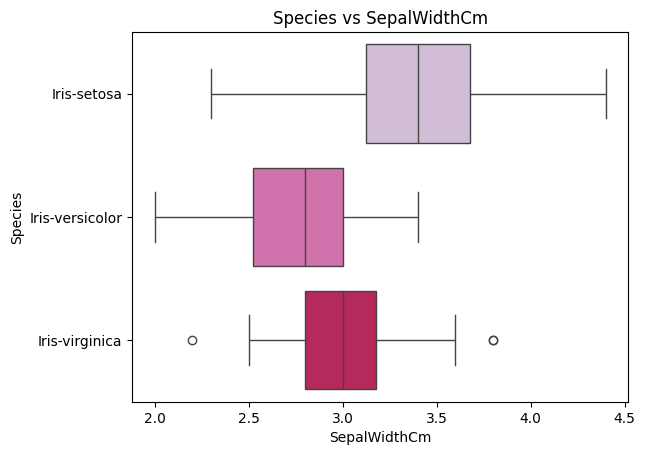

In [9]:
# Species vs SepalWidthCm 
sns.boxplot(data=df, x="SepalWidthCm", y="Species", palette="PuRd")
plt.xlabel('SepalWidthCm')
plt.ylabel('Species')
plt.title('Species vs SepalWidthCm')
plt.show()

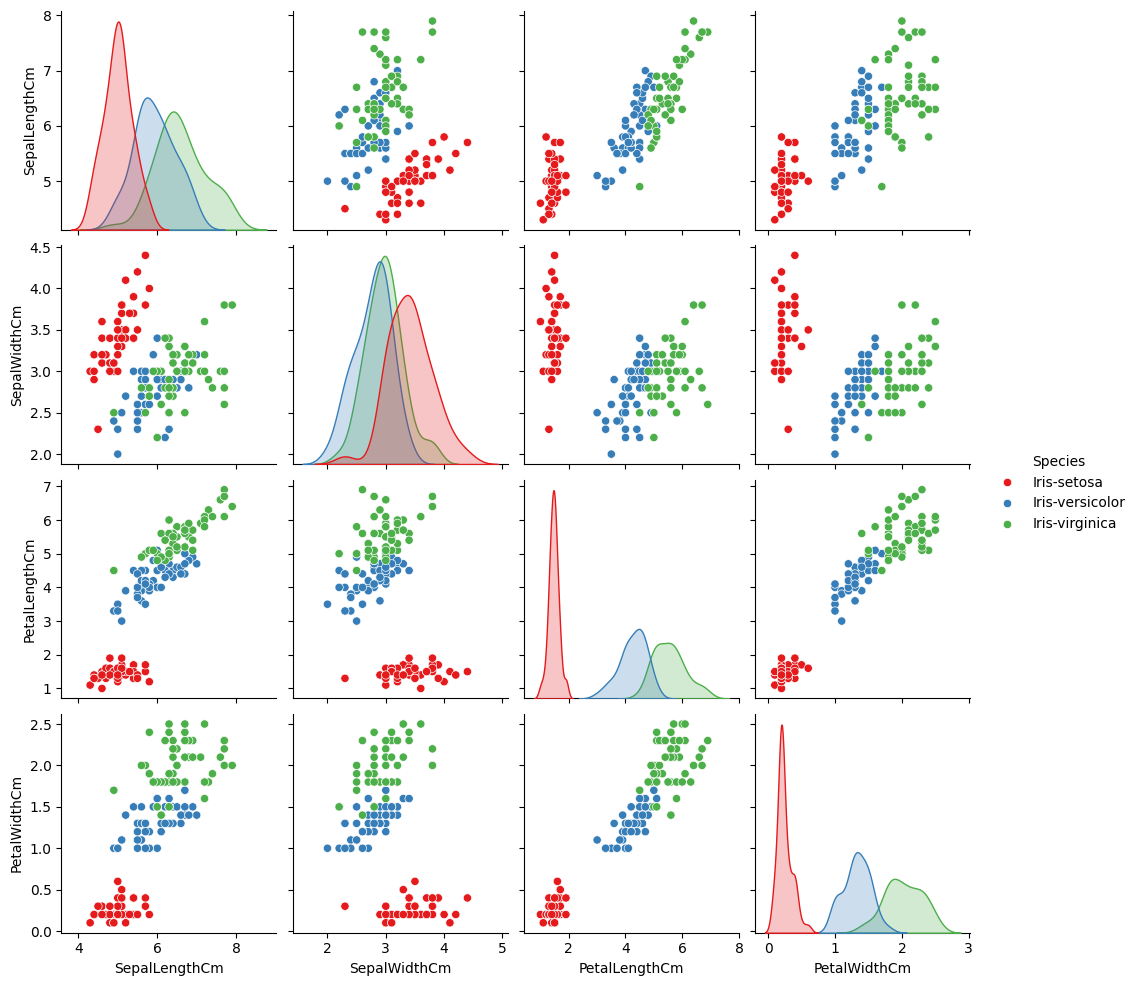

In [10]:
# pairplot
sns.pairplot(df, hue='Species', palette='Set1')
plt.show()

In [11]:
# converting catergorical column 'Species' to Numerical
from sklearn.preprocessing import LabelEncoder, StandardScaler

encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])

# Training the Model

In [12]:
# split into features training and testing dataset
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

X = df.drop(columns=['Species'])
y = df['Species']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42, stratify=y)

In [13]:
# normalizing the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Training the model
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Predictions

In [15]:
# Prediction
y_pred = model.predict(X_test)

In [16]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)


print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



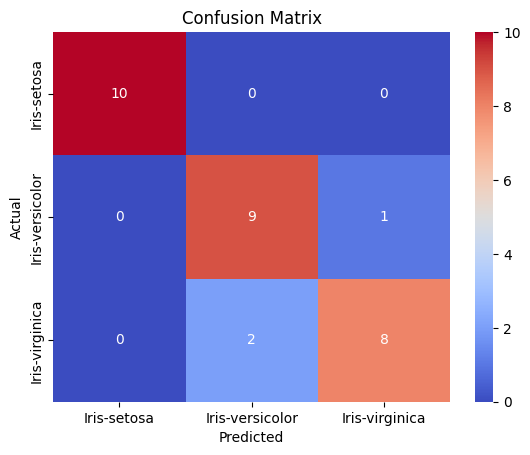

In [17]:
# confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt='d', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
